# **Proyecto final - Módulo III - Big Data**
# **Grupo 3**
# **Dataset: Breast Cancer Prediction** 
## https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset

## Integrantes:
##- Edwin Molina
##- Francisco Porras


## Descripción del dataset
Este datos de este dataset fueron obtenidos de los hospitales de la Universidad de Wisconsin, en  Madison, Wisconsin en los Estados Unidos, proporsionados por el Dr. William H. Wolberg.

Contiene datos de las características de los abultamientos detectados en pacientes de posibles cancer de seno y su diagnóstico final. 

Las variable del dataset son:
* **diagnosis:** Es el diagnóstico del tejido mamario. 1 es maligno, 0 es benigno, donde maligno significa que la enfermedad es peligrosa. 
* **mean_radius:** Es el promedio de las distancias entre el centro a los puntos del perímetro.
* **mean_texture:** Es la desviación estandar de los valores de la escala de grises en la imágen. 
* **mean_perimeter:** Es el promedio del tamaño del núcleo del tumor.
* **mean_area:** Es la media del área del nucleo del tumor.
* **mean_smoothness:** Es la media de la variación local de las longitudes del radio del tumor.


## Importación de librerías y del dataset

In [ ]:
pip install kneed

In [ ]:

# Importando las librerías requeridas
import argparse # Biblioteca para crear enlaces entre interfaces y mantener estructuras de datos 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
sns.set()
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.mixture import GaussianMixture #GMM
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler # Normalizador de datos
from sklearn.preprocessing import MinMaxScaler # Normalizador de minimos
from sklearn.decomposition import PCA # Biblioteca de componentes principales
from sklearn.model_selection import train_test_split #lograr dividir las muestras
from sklearn.model_selection import cross_val_score #validación cruzada score 
from sklearn.model_selection import StratifiedKFold #validacion cruzada 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix #matriz de confusión
from sklearn.metrics import accuracy_score #score de validación cruzada 
from sklearn.linear_model import LogisticRegression #regresion logística
from sklearn.tree import DecisionTreeClassifier #arboles de decision
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #Análisis discriminante lineal 
from sklearn.naive_bayes import GaussianNB #Gauss Bayesiana
from sklearn.svm import SVC # Maquinas de Soporte Vectorial
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense
from pandas import DataFrame
from matplotlib import colors as mcolors
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
from kneed import KneeLocator # Biblioteca que permite pintar puntos de inflexion en funciones (Elbow Method)
import tensorflow as tf
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importando dataset
datos = pd.read_csv('/content/drive/MyDrive/PYTHON VERITAS/Breast_cancer_data.csv', delimiter=',', error_bad_lines=False)
datos.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [ ]:
datos.shape

(569, 6)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
# Validando los tipos de las variables
data = datos.copy()
data.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [ ]:
# Revisando valores nulos
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

Se determina que no hay valores nulos, y que los tipos de valores están de acuerdo a lo esperado.

## Análisis Exploratorio de Datos

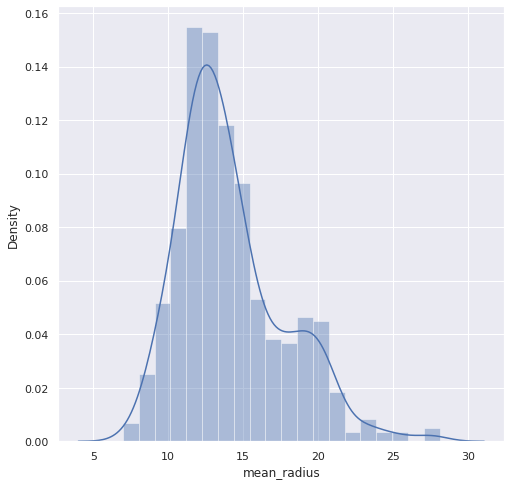

In [ ]:
# Exploracion y descripcion de datos inciales 

plt.figure(figsize=(8,8))
sns.distplot(data.mean_radius,bins=20); 

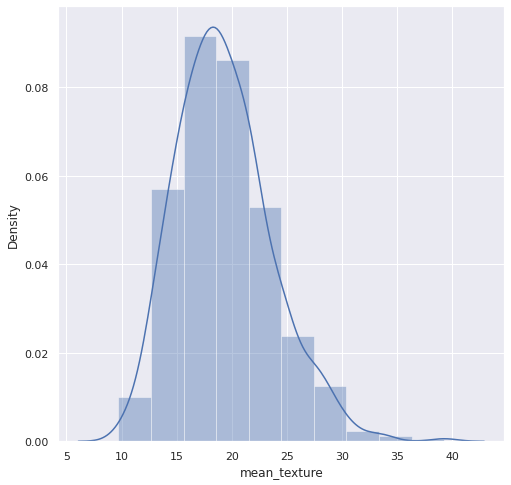

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(data.mean_texture,bins=10);

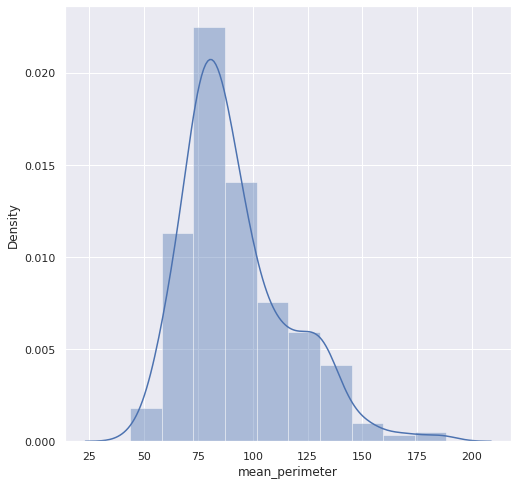

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(data.mean_perimeter,bins=10);

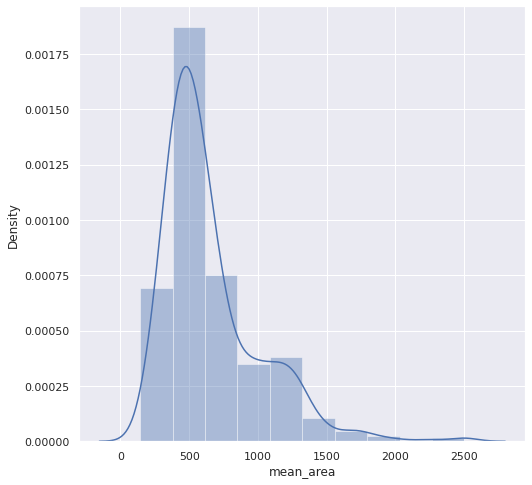

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(data.mean_area,bins=10);

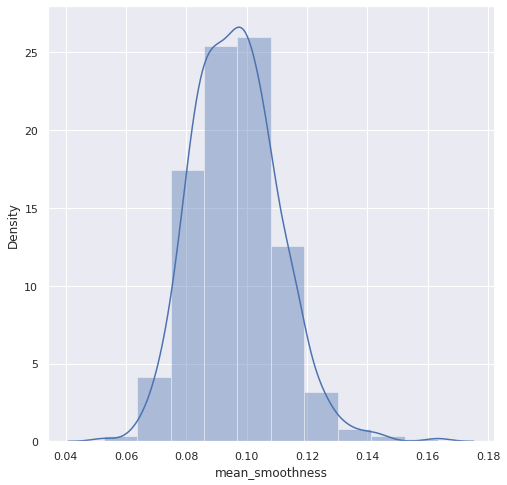

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(data.mean_smoothness,bins=10);

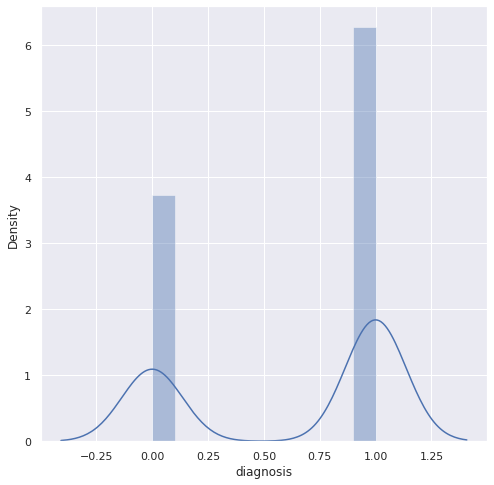

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(data.diagnosis,bins=10);

In [ ]:
# Describiendo las variables cuantitativas, por Cuenta, Media, Mediana, Desviación estándar, Cuartiles (1ro, 2do y 3ro), Mínimo y Máximo 
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


Para 'mean_radius':
Moda: 12.34
Media: El promedio de este índice para las 569 compañías es de 14.127291739894563
Mediana: 50% de las compañías tienen este índice menor o igual que 13.37 y el otro 50% es mayor o igual a 13.37
Primer Cuartil: El 25% de las compañías tienen este índice menor o iguale a 11.7
Segundo Cuartil: El 50% de las compañías tienen este índice menor o iguale a 13.37
Tercer Cuartil: El 75% de las compañías tienen este índice menor o iguale a 15.78
Mínimo: El mínimo del índice es: 6.981
Máximo: El máximo del índice es: 28.11
Varianza: La varianza de este índice es de  12.42 con respecto a la media
Desviación Estandar: La desviación estándar de este índice es de 3.52 con respecto a la media. 
Esto puede indicar si fuera una distribución normal, que el 68% de las compañías van desde los 10.60  y los 17.65 en este índice 
y que el 95% de las compañías  van desde los 7.08 y los 21.18 .
Asimetría: La curva de frecuencia cuenta con una leve asimetría positiva
Existen datos

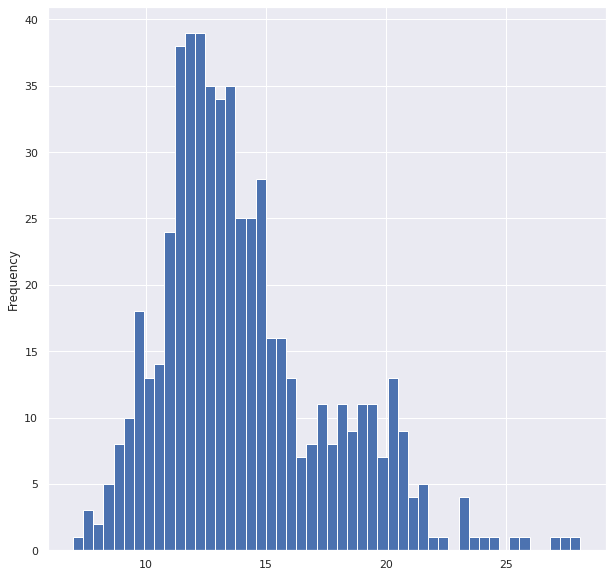

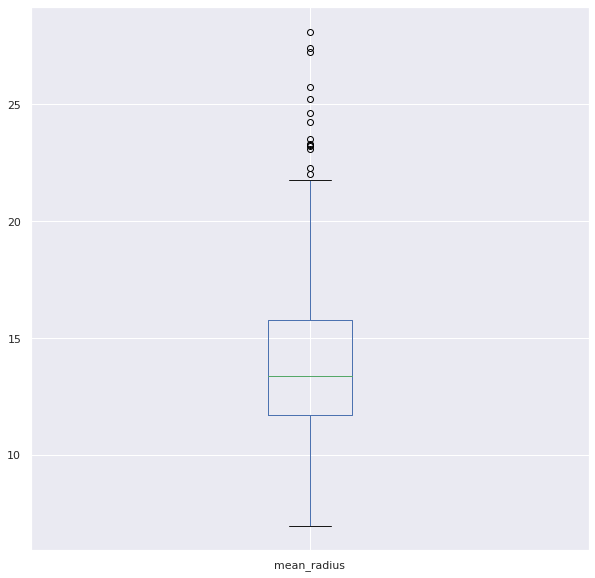


***********************************************************

Para 'mean_texture':
Modas: 
  14.93
  15.7
  16.84
  16.85
  17.46
  18.22
  18.9
  19.83
  20.52
Media: El promedio de este índice para las 569 compañías es de 19.28964850615117
Mediana: 50% de las compañías tienen este índice menor o igual que 18.84 y el otro 50% es mayor o igual a 18.84
Primer Cuartil: El 25% de las compañías tienen este índice menor o iguale a 16.17
Segundo Cuartil: El 50% de las compañías tienen este índice menor o iguale a 18.84
Tercer Cuartil: El 75% de las compañías tienen este índice menor o iguale a 21.8
Mínimo: El mínimo del índice es: 9.71
Máximo: El máximo del índice es: 39.28
Varianza: La varianza de este índice es de  18.50 con respecto a la media
Desviación Estandar: La desviación estándar de este índice es de 4.30 con respecto a la media. 
Esto puede indicar si fuera una distribución normal, que el 68% de las compañías van desde los 14.99  y los 23.59 en este índice 
y que el 95% de las com

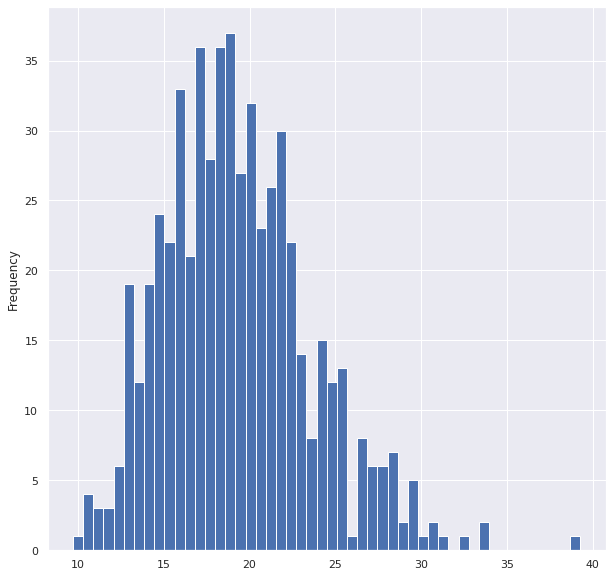

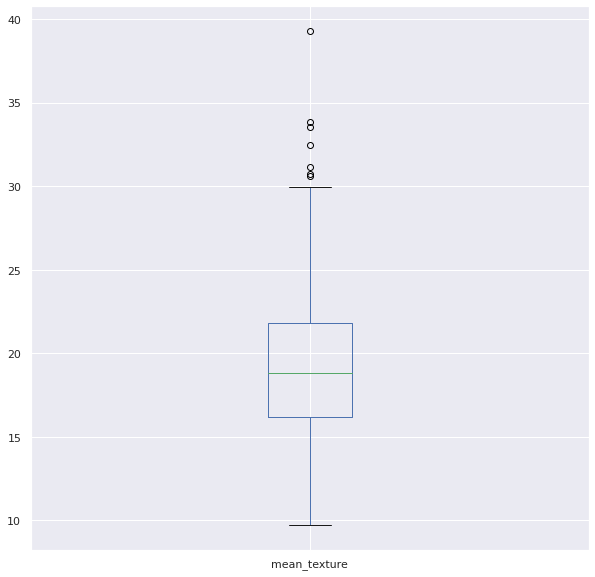


***********************************************************

Para 'mean_perimeter':
Modas: 
  82.61
  87.76
  134.7
Media: El promedio de este índice para las 569 compañías es de 91.96903339191566
Mediana: 50% de las compañías tienen este índice menor o igual que 86.24 y el otro 50% es mayor o igual a 86.24
Primer Cuartil: El 25% de las compañías tienen este índice menor o iguale a 75.17
Segundo Cuartil: El 50% de las compañías tienen este índice menor o iguale a 86.24
Tercer Cuartil: El 75% de las compañías tienen este índice menor o iguale a 104.1
Mínimo: El mínimo del índice es: 43.79
Máximo: El máximo del índice es: 188.5
Varianza: La varianza de este índice es de  590.44 con respecto a la media
Desviación Estandar: La desviación estándar de este índice es de 24.30 con respecto a la media. 
Esto puede indicar si fuera una distribución normal, que el 68% de las compañías van desde los 67.67  y los 116.27 en este índice 
y que el 95% de las compañías  van desde los 43.37 y los 140.5

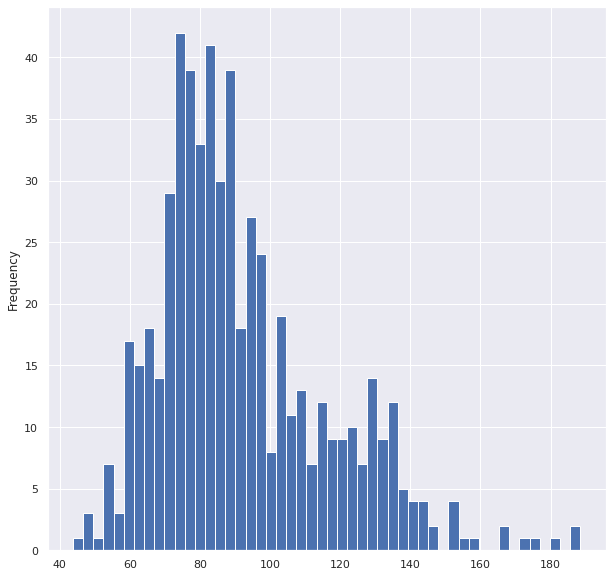

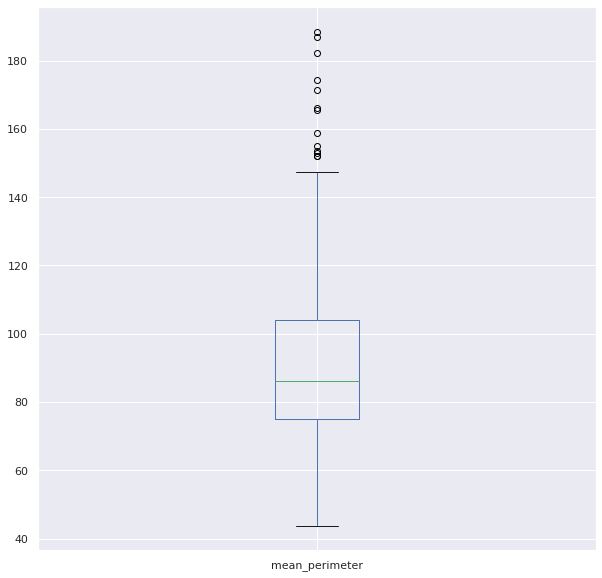


***********************************************************

Para 'mean_area':
Moda: 512.2
Media: El promedio de este índice para las 569 compañías es de 654.8891036906857
Mediana: 50% de las compañías tienen este índice menor o igual que 551.1 y el otro 50% es mayor o igual a 551.1
Primer Cuartil: El 25% de las compañías tienen este índice menor o iguale a 420.3
Segundo Cuartil: El 50% de las compañías tienen este índice menor o iguale a 551.1
Tercer Cuartil: El 75% de las compañías tienen este índice menor o iguale a 782.7
Mínimo: El mínimo del índice es: 143.5
Máximo: El máximo del índice es: 2501.0
Varianza: La varianza de este índice es de  123843.55 con respecto a la media
Desviación Estandar: La desviación estándar de este índice es de 351.91 con respecto a la media. 
Esto puede indicar si fuera una distribución normal, que el 68% de las compañías van desde los 302.97  y los 1006.80 en este índice 
y que el 95% de las compañías  van desde los -48.94 y los 1358.72 .
Asimetría: L

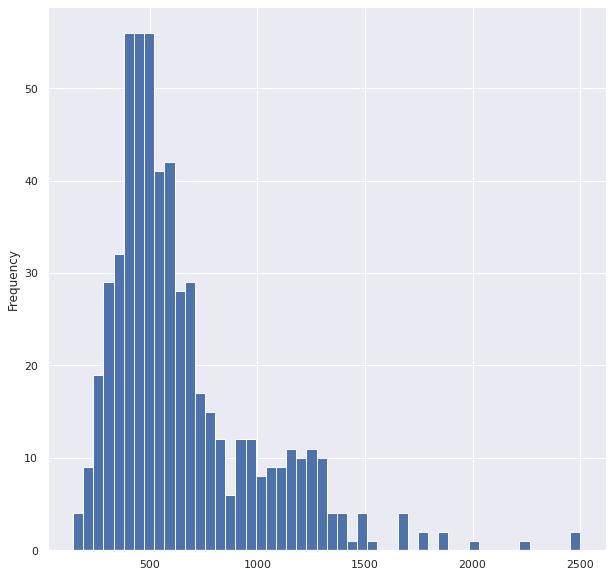

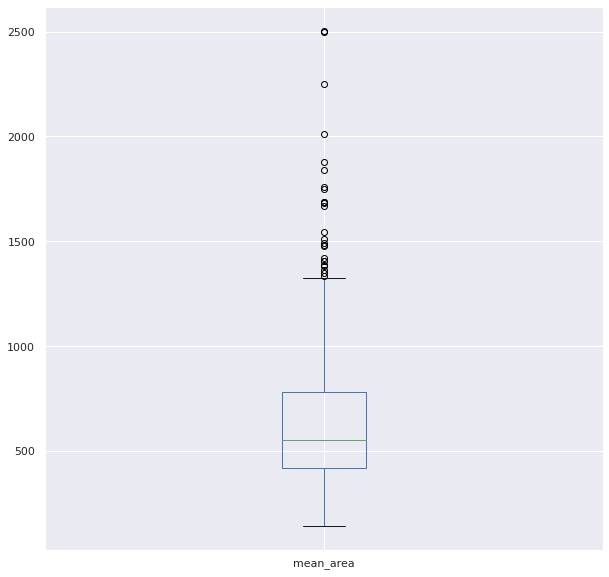


***********************************************************

Para 'mean_smoothness':
Moda: 0.1007
Media: El promedio de este índice para las 569 compañías es de 0.096360281195079
Mediana: 50% de las compañías tienen este índice menor o igual que 0.09587000000000001 y el otro 50% es mayor o igual a 0.09587000000000001
Primer Cuartil: El 25% de las compañías tienen este índice menor o iguale a 0.08637
Segundo Cuartil: El 50% de las compañías tienen este índice menor o iguale a 0.09587000000000001
Tercer Cuartil: El 75% de las compañías tienen este índice menor o iguale a 0.1053
Mínimo: El mínimo del índice es: 0.052629999999999996
Máximo: El máximo del índice es: 0.1634
Varianza: La varianza de este índice es de  0.00 con respecto a la media
Desviación Estandar: La desviación estándar de este índice es de 0.01 con respecto a la media. 
Esto puede indicar si fuera una distribución normal, que el 68% de las compañías van desde los 0.08  y los 0.11 en este índice 
y que el 95% de las compa

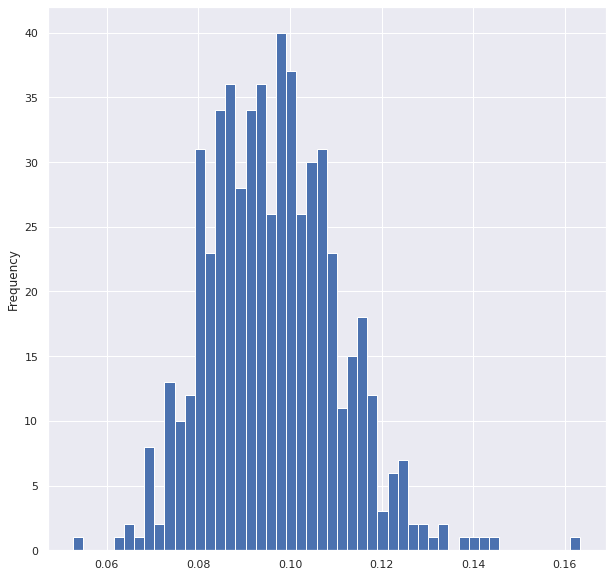

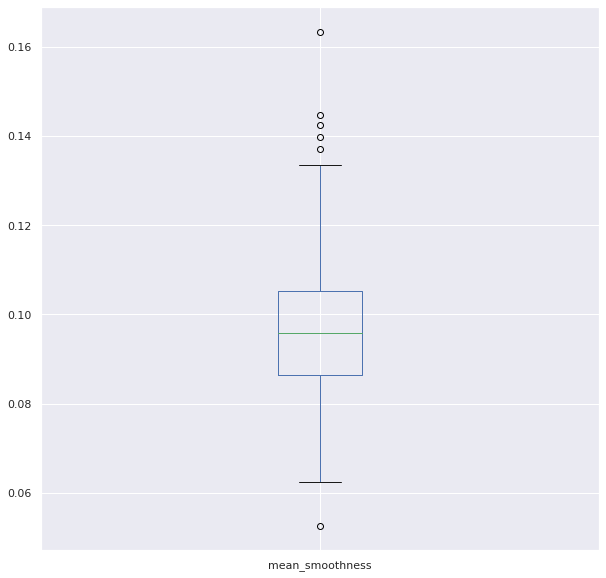


***********************************************************

Para 'diagnosis':
Moda: 1


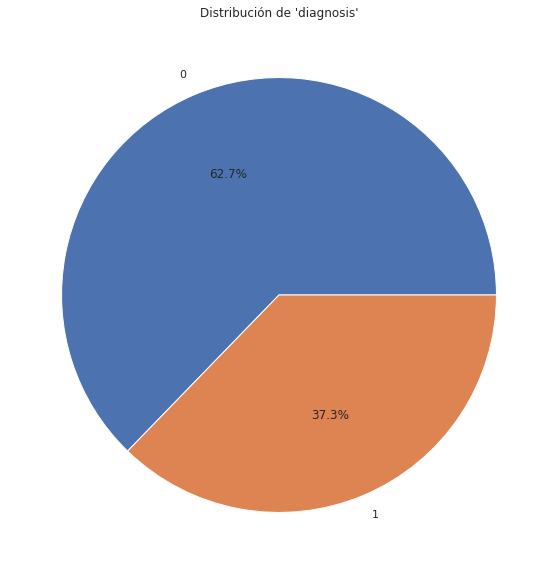


***********************************************************



In [ ]:
# Describiendo cada variable cuantitava con moda, media, mediana, desviación estandar, cuartiles, mínimo, máximo, varianza, asimetría y outliers. Además de los gráficos de box plot y frecuencias.
# Las variables binarias seran descritas solo por la moda y distribución de frecuencias. 

for column in data:
  if data.dtypes[column]== "float":
    print("Para '{}':".format(column))
    # moda
    moda = data[column].mode()
    if len(moda) == 1:
      print("Moda: {}".format(moda[0]))
    elif len(moda) > 1:
      print("Modas: ".format(column))
      count = 0
      for m  in moda:
        if count < 10:
          print (f"  {m}")
          count = count + 1
        else:
          print ("Se encontraron más de 10 modas")
          break
    # Media
    cantidad_muestras = data[column].size
    media = data[column].mean()
    print("Media: El promedio de este índice para las {} compañías es de {}".format(cantidad_muestras, media))

    # Mediana
    mediana = data[column].median()
    print("Mediana: 50% de las compañías tienen este índice menor o igual que {} y el otro 50% es mayor o igual a {}".format(mediana, mediana))

    # Primer Cuartil
    primer_cuartil = data[column].quantile(0.25)
    print(f"Primer Cuartil: El 25% de las compañías tienen este índice menor o iguale a {primer_cuartil}")

    # Segundo Cuartil
    segundo_cuartil = data[column].quantile(0.50)
    print(f"Segundo Cuartil: El 50% de las compañías tienen este índice menor o iguale a {segundo_cuartil}")

    # Tercer Cuartil
    tercer_cuartil = data[column].quantile(0.75)
    print(f"Tercer Cuartil: El 75% de las compañías tienen este índice menor o iguale a {tercer_cuartil}")

    # Mínimo
    min = data[column].min()
    print(f"Mínimo: El mínimo del índice es: {min}")

    # Máximo
    max = data[column].max()
    print(f"Máximo: El máximo del índice es: {max}")

    # Varianza
    varianza = data[column].var()
    print("Varianza: La varianza de este índice es de ",
          "{:.2f} con respecto a la media".format(varianza))

    # Desviación Estándar
    ds = data[column].std()
    print("Desviación Estandar: La desviación estándar de este índice es de {:.2f} con respecto a la media.".format(ds),
          "\nEsto puede indicar si fuera una distribución normal, que el 68% de las "
          "compañías van desde los {:.2f} ".format(media - ds),
          "y los {:.2f} en este índice \ny que el 95% de las compañías ".format(media + ds),
          "van desde los {:.2f} y los {:.2f} .".format(media - 2 * ds, media + 2 * ds))
    
    # Asimetría
    mitad = ((max - min) / 2) + min
    if media < mitad: 
      if (media - min) <= ((mitad - min) * 0.5):
        print("Asimetría: La curva de frecuencia cuenta con una asimetría positiva muy marcada")
      elif (media - min) <= ((mitad - min) * 0.8):
        print("Asimetría: La curva de frecuencia cuenta con una leve asimetría positiva")
      else:
        print("Asimetría: La curva de frecuencia cuenta con una leve asimetría positiva tendiendo a una curva normal")
    elif media > mitad:
      if (max - media) <= ((max - mitad) * 0.5):
        print("Asimetría: La curva de frecuencia cuenta con una asimetría negativa muy marcada")
      elif (max - media) <= ((max - mitad) * 0.8):
        print("Asimetría: La curva de frecuencia cuenta con una leve asimetría negativa")
      else:
        print("Asimetría: La curva de frecuencia cuenta con una leve asimetría negativa tendiendo a una curva normal")
    else: 
      print("Asimetría: La curva de frecuencia es una curva normal")
    
    # Outliers:
    IQR = tercer_cuartil - primer_cuartil
    limite_inferior = primer_cuartil - 1.5 * IQR
    limite_superior = tercer_cuartil + 1.5 * IQR 
    if max > limite_superior:
      print("Existen datos atípicos mayores al límite superior")
    else:
      print("No existen datos atípicos mayores al límite superior")
    if min < limite_inferior:
      print("Existen datos atípicos menores al límite inferior")
    else:
      print("No existen datos atípicos menores al límite inferior")
    # Histograma
    f, ax = plt.subplots(figsize=(10, 10))
    data[column].plot.hist(bins=50,)
    plt.show();
    print("")
    # Boxplot
    f, ax = plt.subplots(figsize=(10, 10))
    data[column].plot(kind = "box")
    plt.show()
  else:
    print("Para '{}':".format(column))
    # moda
    moda = data[column].mode()
    print("Moda: {}".format(moda[0]))
    # Pie chart
    f, ax = plt.subplots(figsize=(10, 10))
    plt.title("Distribución de '{}'".format(column))
    sums = data[column].value_counts()
    labels = data[column].unique()
    plt.pie(sums, labels=labels, autopct='%1.1f%%', )
    plt.show();

  print("\n***********************************************************\n")

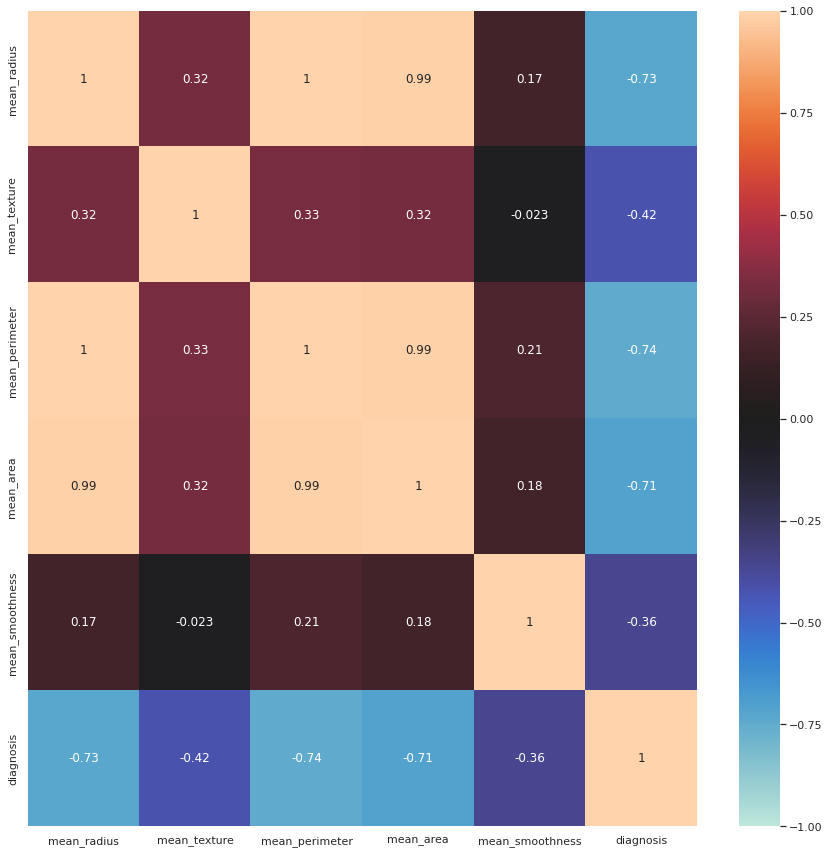

In [ ]:
# Sacando la correlación de las variables
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(data.corr(method = 'pearson'), annot = True, vmin = -1, vmax = 1, center = 0 );

## Limpieza de datos atípicos

Del análisis anterior, se pueden ver que las 5 varibles cuantitativas contienen valores atípicos, por lo que se procederá a imputar los datos anómalos.

Para mean_radius
Máximo: 28.11
Limite superior: 21.9
Mínimo: 6.981
Límite inferior: 5.579999999999999
Mediana: 13.37
Sigma 3.06
Multiplicador: 2.787581699346405
Se quitaron 14(2.46%) de los datos

Box-plot quitando valores atípicos


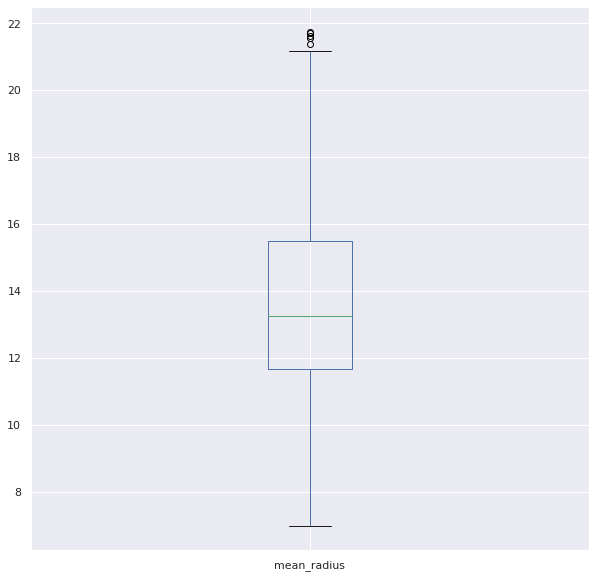


Box-plot con todos los datos


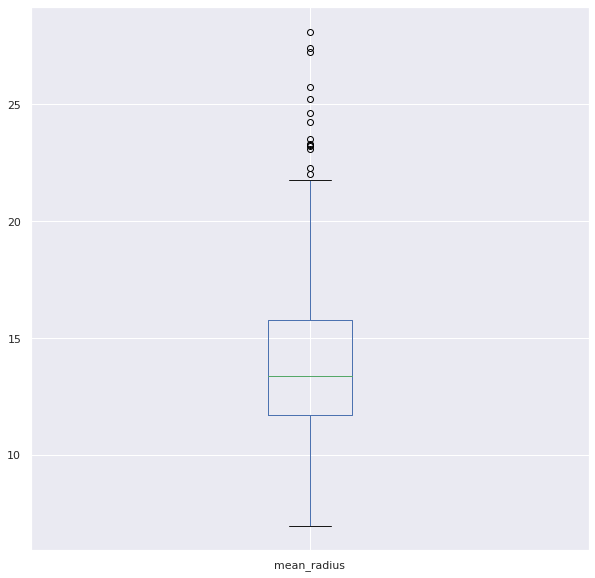

**************************************************************************
Para mean_texture
Máximo: 39.28
Limite superior: 30.244999999999997
Mínimo: 9.71
Límite inferior: 7.725000000000003
Mediana: 18.84
Sigma 4.222499999999999
Multiplicador: 2.7010065127294256
Se quitaron 21(3.69%) de los datos

Box-plot quitando valores atípicos


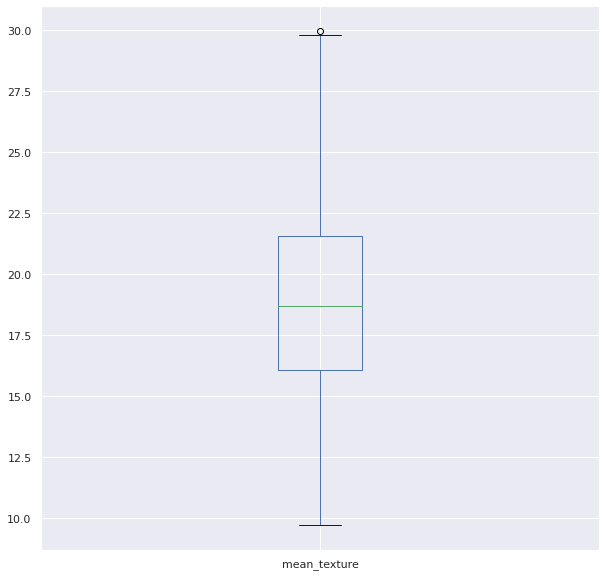


Box-plot con todos los datos


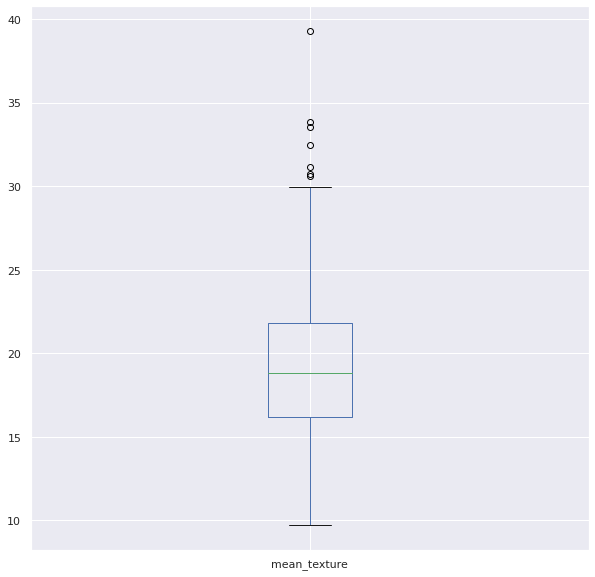

**************************************************************************
Para mean_perimeter
Máximo: 188.5
Limite superior: 147.49499999999998
Mínimo: 43.79
Límite inferior: 31.775000000000013
Mediana: 86.24
Sigma 21.697499999999994
Multiplicador: 2.82313630602604
Se quitaron 21(3.69%) de los datos

Box-plot quitando valores atípicos


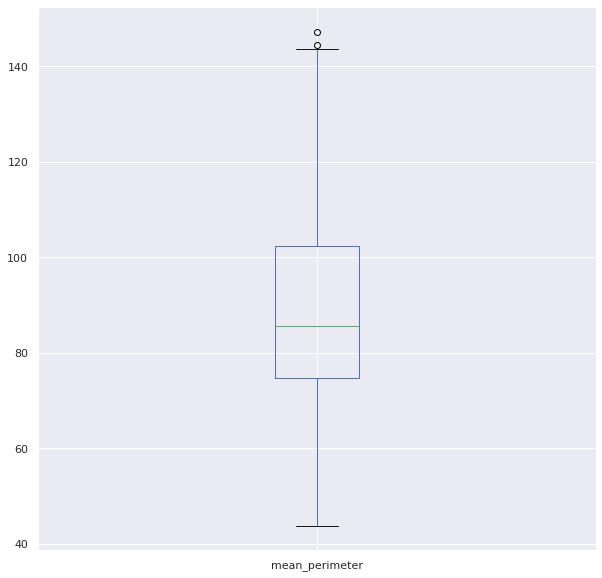


Box-plot con todos los datos


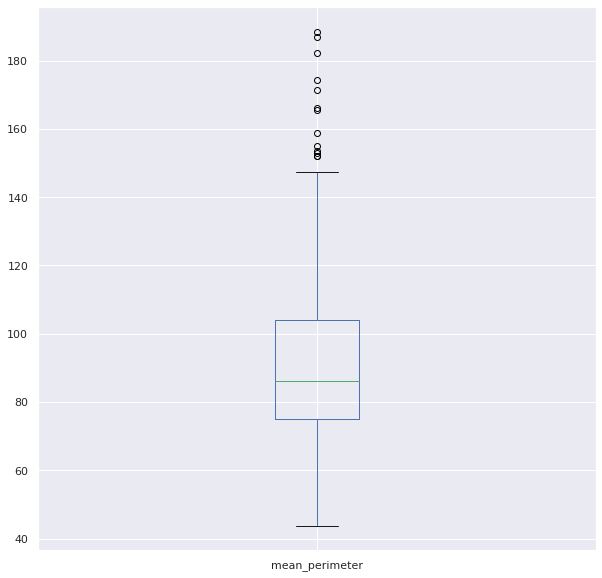

**************************************************************************
Para mean_area
Máximo: 2501.0
Limite superior: 1326.3000000000002
Mínimo: 143.5
Límite inferior: -123.30000000000001
Mediana: 551.1
Sigma 271.8
Multiplicador: 2.852097130242826
Se quitaron 31(5.45%) de los datos

Box-plot quitando valores atípicos


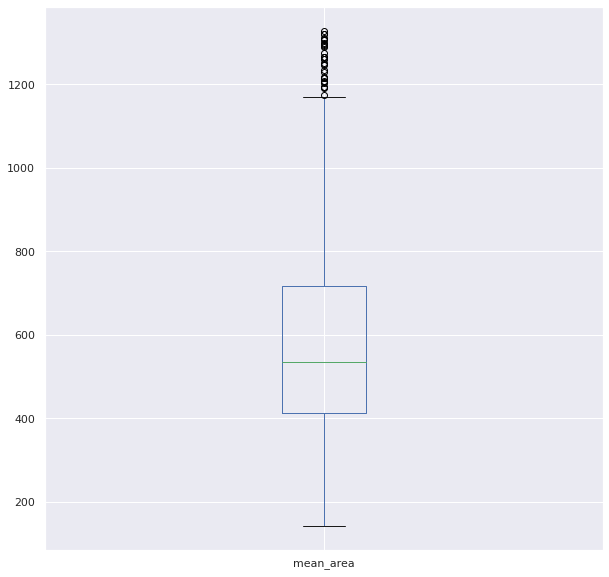


Box-plot con todos los datos


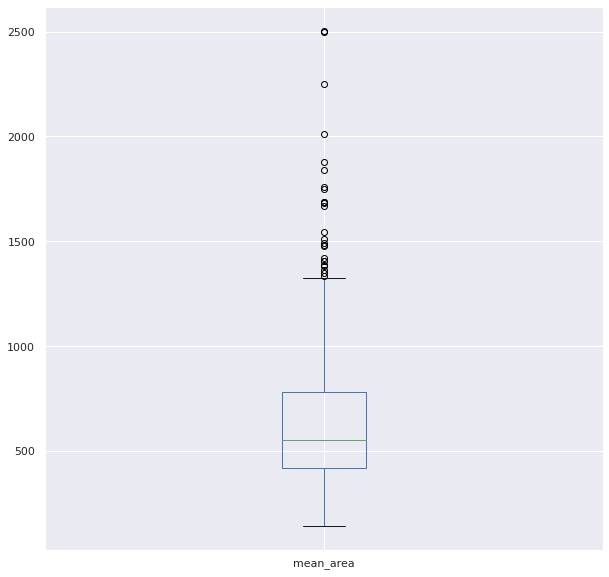

**************************************************************************
Para mean_smoothness
Máximo: 0.1634
Limite superior: 0.133695
Mínimo: 0.052629999999999996
Límite inferior: 0.057975
Mediana: 0.09587000000000001
Sigma 0.014197500000000002
Multiplicador: 2.6691318894171516
Se quitaron 36(6.33%) de los datos

Box-plot quitando valores atípicos


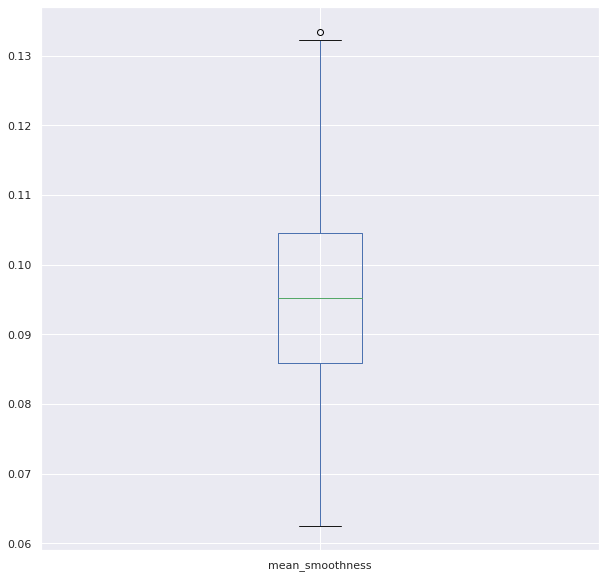


Box-plot con todos los datos


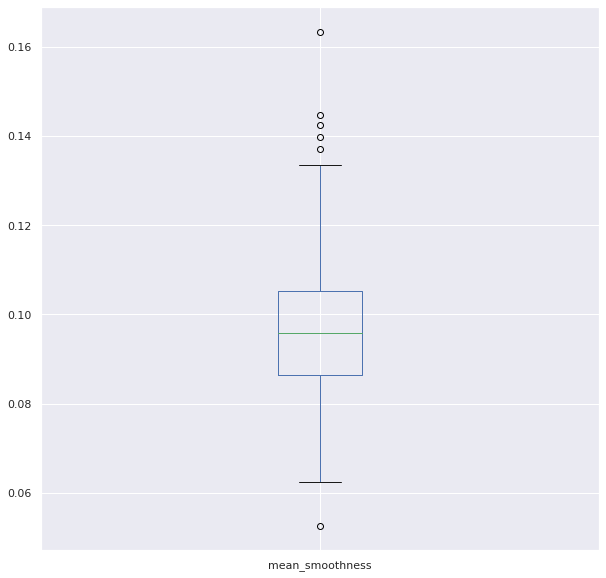

**************************************************************************


In [ ]:
# Analizando desde el punto de dispersion de los datos 
data_copy = data.copy()
for column in data_copy:
  if data.dtypes[column]== "float":
    print("Para {}".format(column))
    quantiles = np.percentile(data[column], [25,50,75])
    median = quantiles[1]
    IQR = quantiles[2]-quantiles[0]
    limite_inferior = quantiles[0] - 1.5 * IQR
    limite_superior = quantiles[2] + 1.5 * IQR 
    sigma = 0.75 * IQR
    sup_multiplier = ""
    inf_multiplier = ""
    if data[column].max() > limite_superior: 
      sup_multiplier = (limite_superior - quantiles[1]) / sigma
    if data[column].min() < limite_inferior:
      inf_multiplier = -(limite_inferior - quantiles[1]) / sigma
    multiplier = ""
    if sup_multiplier and inf_multiplier:
      if  sup_multiplier < inf_multiplier:
        multiplier = inf_multiplier
      else:
        multiplier = sup_multiplier
    elif sup_multiplier:
      multiplier = sup_multiplier
    else:
      multiplier = inf_multiplier
    if multiplier:
      print("Máximo: {}\nLimite superior: {}\nMínimo: {}\nLímite inferior: {}\nMediana: {}\nSigma {}\nMultiplicador: {}".format(
          data[column].max(), limite_superior, data[column].min(),  limite_inferior, quantiles[1], sigma, multiplier))
      data_copy = data_copy.query("({} > @median - {}*@sigma) & ({} < @median + {}*@sigma)".format(column, multiplier, column, multiplier))
      print("Se quitaron {}({:.2f}%) de los datos".format(data.shape[0] - data_copy.shape[0], (data.shape[0] - data_copy.shape[0])*100/data.shape[0]))
    else:
      print("No se quitaron valores atípicos")
    print("\nBox-plot quitando valores atípicos")
    f, ax = plt.subplots(figsize=(10, 10))
    data_copy[column].plot(kind = "box")
    plt.show()
    print("\nBox-plot con todos los datos")
    f, ax = plt.subplots(figsize=(10, 10))
    data[column].plot(kind = "box")
    plt.show()
    print("**************************************************************************")


Se quitaron en total 21 datos atípicos lo que significa un 3.69% de los datos.

In [ ]:
# Restableciendo el índice después de la imputación de datos
data_copy.reset_index(drop=True, inplace=True)
data_copy

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,20.29,14.34,135.10,1297.0,0.10030,0
4,12.45,15.70,82.57,477.1,0.12780,0
...,...,...,...,...,...,...
528,14.05,27.15,91.38,600.4,0.09929,1
529,11.20,29.37,70.67,386.0,0.07449,1
530,20.13,28.25,131.20,1261.0,0.09780,0
531,16.60,28.08,108.30,858.1,0.08455,0


In [ ]:
# Balance de la variable 'diagnosis' antes de la imputación
data['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [ ]:
# Balance de la variable 'diagnosis' después de la imputación
data_copy['diagnosis'].value_counts()

1    352
0    181
Name: diagnosis, dtype: int64

Se puede ver que la imputación de datos afectó más a los datos de diagnóstico negativo que a los positivos, quitando solo 5 datos (1.4%) a los positivos y 31 datos (14.6%) a los negativos. Aún así se considera que hay suficientes datos para modelar el diagnóstico.

## Vizualizacion y Feature Engeineering

In [ ]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


Se realizara una visualizacion de datos para poder ver visualmente la correlacion de algunos datos ya limpios y así poder realizar las acciones de seleccion para mejorar la interpretacion de los datos.

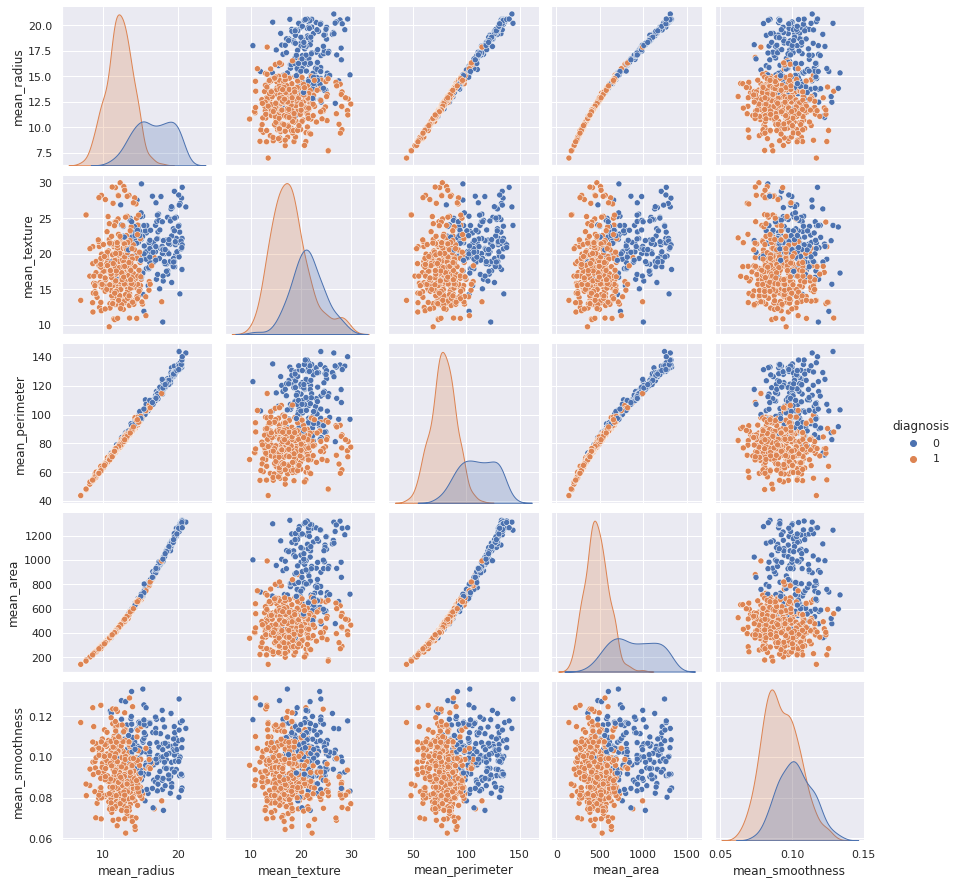

In [ ]:
# Visualizacion de datos por correlacion
sns.pairplot(data_copy, hue='diagnosis', vars=['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness'])

Los graficos anteriores muestran visualmente la correlacion de las variables descritas para el estudio de la prediccion de cancer de seno, se puede observar una alta correlacion entre las variables "mean_radius" y "mean_area" las cuales muestran valores muy similares, por lo que se puede utilizar solamente una de ellas. Así mismo se evaulara la varible mean_perimeter ya que esta tambien tiene una alta correlacion con mean_radius.

Se evaluara que variables se pueden modificar o quitar siempre utilizando la tabla de correlacion para determinar cual variable se puede quitar siempre y cuando esta no afecte los resultados.

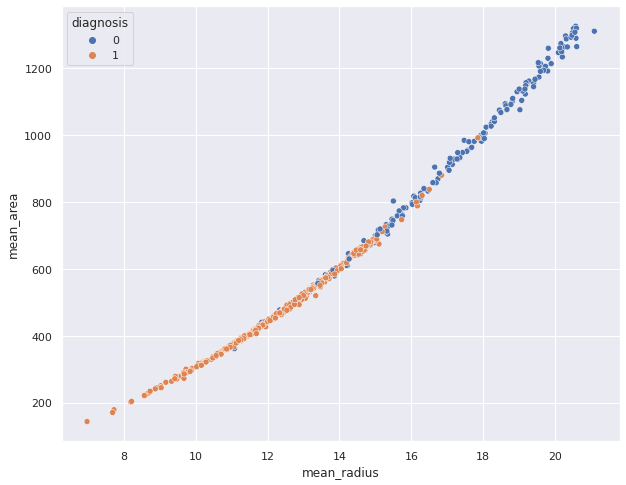

In [ ]:
# Visualizacion de correlacion entre mean_radius y mean_area
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'mean_radius', y = 'mean_area', hue = 'diagnosis', data = data_copy)

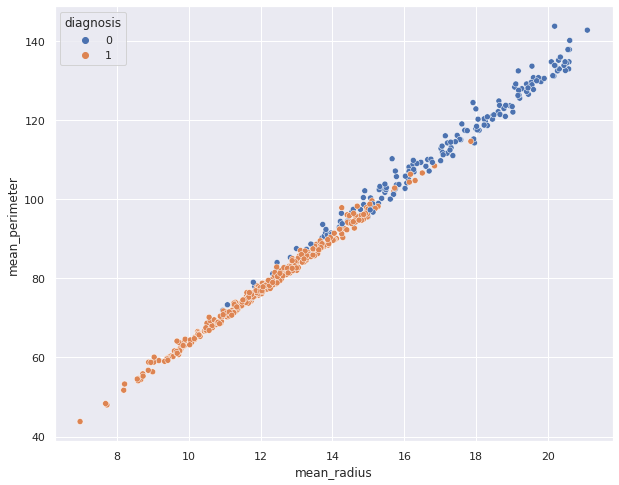

In [ ]:
# Visualizacion de correlacion entre mean_radius y mean_perimeter
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'mean_radius', y = 'mean_perimeter', hue = 'diagnosis', data = data_copy)

Utilizando los graficos anteriores se puede determinar que las variables mean_radius y mean_area son correlativas y que de estas dos pueden ser quitadas para poder seguir con el analisis, dejando siempre la variable mean_perimeter.

In [ ]:
data_copy = data_copy.drop(data_copy[['mean_radius','mean_area']], axis = True)

data_copy.head(10)

,mean_texture,mean_perimeter,mean_smoothness,diagnosis
0,10.38,122.80,0.11840,0
1,17.77,132.90,0.08474,0
2,21.25,130.00,0.10960,0
3,14.34,135.10,0.10030,0
4,15.70,82.57,0.12780,0
5,19.98,119.60,0.09463,0
6,20.83,90.20,0.11890,0
7,21.82,87.50,0.12730,0
8,24.04,83.97,0.11860,0
9,23.24,102.70,0.08206,0


In [ ]:
data_copy.tail(10)

,mean_texture,mean_perimeter,mean_smoothness,diagnosis
523,27.61,65.67,0.09030,1
524,19.59,64.73,0.10030,1
525,27.88,59.26,0.08123,1
526,22.68,96.39,0.08473,1
527,23.93,74.52,0.09261,1
528,27.15,91.38,0.09929,1
529,29.37,70.67,0.07449,1
530,28.25,131.20,0.09780,0
531,28.08,108.30,0.08455,0
532,29.33,140.10,0.11780,0


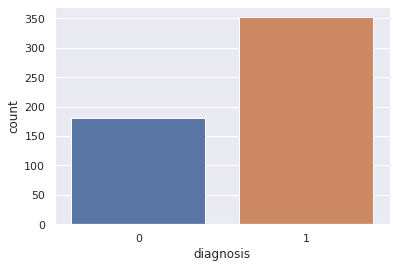

In [ ]:
sns.countplot(data_copy['diagnosis'], label = "Count")


Se puede observar en el grafico anterior que la cuenta de predicciones benignas las de la barra azul, es de aproximadamente 175, mientras que las malignas representadas por la barra naranja tienen un conteo de 357.

In [ ]:
# Renombrando variable para reduccion de dimensionalidad

X = data_copy

In [ ]:
# Normalizando dataframe
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Importando PCA

pca = PCA()
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# El atributo muestra cuanta varianza es explicada por cada uno de las variables
evr = pca.explained_variance_ratio_
evr

array([0.52780553, 0.25351123, 0.16482841, 0.05385483])

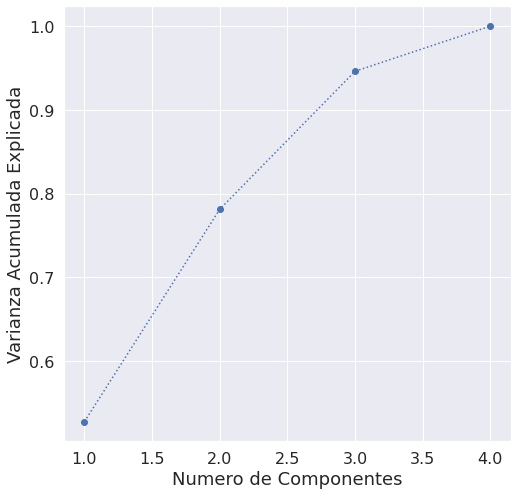

In [ ]:
# Ploteando grafico de Componentes principales
fig = plt.figure(figsize=(8,8))
plt.plot(range(1, len(X.columns)+1), evr.cumsum(), marker='o', linestyle=':')
plt.xlabel('Numero de Componentes', fontsize=18)
plt.ylabel('Varianza Acumulada Explicada',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
# Iteracion para comprobar numero de componentes optimos a utilizar por su nivel de varianza

for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Numero de Componentes Optimos:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(X_std)
scores_pca = pca.transform(X_std)

Numero de Componentes Optimos: 3


In [ ]:
# Encontrando el punto del codo de la curva de WCSS (dentro de la suma de cuadrados) usando el KneedLocator
wcss = []
max_clusters = 21
for i in range(1, max_clusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, max_clusters)], wcss, curve='convex', direction='decreasing').knee
print("Numero de Clusters Optimos:", n_clusters)

Numero de Clusters Optimos: 5


In [ ]:
# Creando la optimizacion de parametros con PCA y K-Means
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

In [ ]:
# Etiquentando cada uno de los datos dentro del cluster respectivo
df_seg_pca_kmeans = pd.concat([pd.DataFrame(X.reset_index(drop=True)), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

,mean_texture,mean_perimeter,mean_smoothness,diagnosis,Component 1,Component 2,Component 3,Cluster
0,10.38,122.80,0.11840,0,1.497789,2.587720,-1.816862,3
1,17.77,132.90,0.08474,0,1.784111,-0.577633,-1.947184,1
2,21.25,130.00,0.10960,0,2.597756,0.472263,-0.409764,3
3,14.34,135.10,0.10030,0,1.848653,0.862976,-2.065852,3
4,15.70,82.57,0.12780,0,1.076077,2.555222,0.468142,3


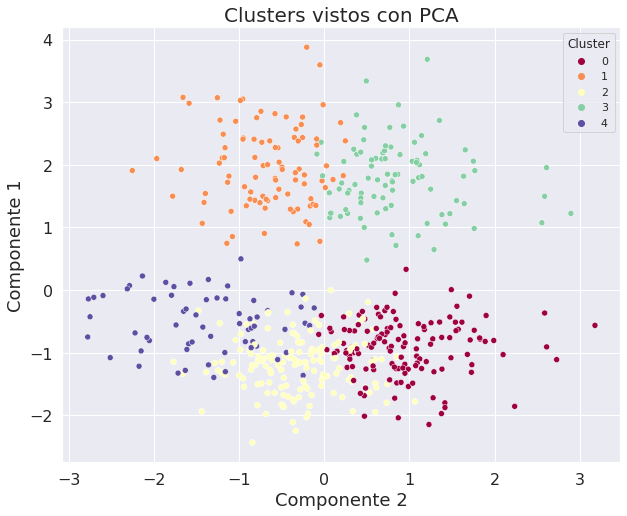

In [ ]:
# Creando visualizacion de los datos con PCA

x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ('Spectral'))
plt.title('Clusters vistos con PCA', fontsize=20)
plt.xlabel("Componente 2", fontsize=18)
plt.ylabel("Componente 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();

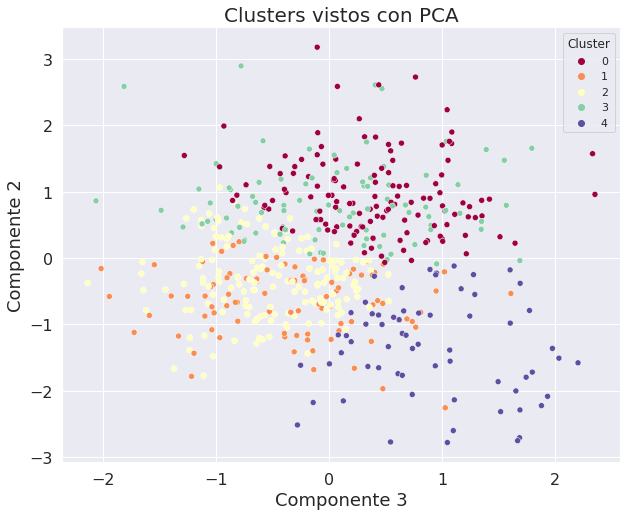

In [ ]:
# Creando visualizacion de los datos con PCA

x = df_seg_pca_kmeans['Component 3']
y = df_seg_pca_kmeans['Component 2']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ('Spectral'))
plt.title('Clusters vistos con PCA', fontsize=20)
plt.xlabel("Componente 3", fontsize=18)
plt.ylabel("Componente 2", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();

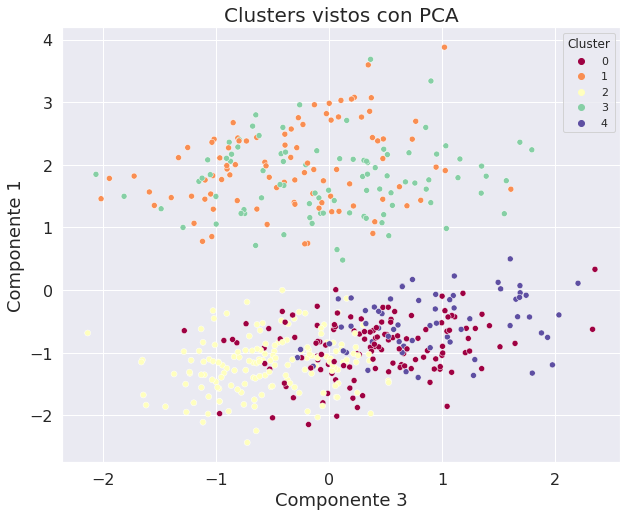

In [ ]:
# Creando visualizacion de los datos con PCA

x = df_seg_pca_kmeans['Component 3']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ('Spectral'))
plt.title('Clusters vistos con PCA', fontsize=20)
plt.xlabel("Componente 3", fontsize=18)
plt.ylabel("Componente 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show();

## Modelos Supervisados
## ML

In [ ]:
# Regresion Logistica

X.head()

,mean_texture,mean_perimeter,mean_smoothness,diagnosis
0,10.38,122.80,0.11840,0
1,17.77,132.90,0.08474,0
2,21.25,130.00,0.10960,0
3,14.34,135.10,0.10030,0
4,15.70,82.57,0.12780,0


In [ ]:
# Comprobando que todas sean variables numericas 
X.dtypes

mean_texture       float64
mean_perimeter     float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [ ]:
# Conjunto de datos de validación dividida
# Con el 80% se crea el modelo y con el 20% se entrena

x, y = X.drop('diagnosis',axis=1),X['diagnosis']

# Se dividen los datos en conjunto de entrenamiento y prueba, se utiliza random_state = 0 para que no dé
# resultados diferentes si se vuelve a correr. 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=10) 
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape


((426, 3), (107, 3), (426,), (107,))

In [ ]:
# Normalizando dataset, ya que se encuentra en diferentes escalas.
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [ ]:
# Comprobando reescalado de variables
# Recordar que la normalizacion reescala las variables entre 0 y 1
print(X_train)

     mean_texture  mean_perimeter  mean_smoothness
245      0.203405        0.979094         0.000764
278      0.175840        0.984418         0.001213
447      0.186442        0.982465         0.001071
60       0.223892        0.974613         0.001060
217      0.282639        0.959226         0.000932
..            ...             ...              ...
369      0.221346        0.975195         0.001285
320      0.262610        0.964901         0.001509
527      0.305744        0.952113         0.001183
125      0.188124        0.982145         0.001055
265      0.170007        0.985442         0.000966

[426 rows x 3 columns]


In [ ]:
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

## Regresion Logistica

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# Entrenamiento del modelo
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression(random_state = 10)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicciones
y_pred = classifier.predict(X_test) 

In [ ]:
# Matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [ ]:
print(cm)

[[17 15]
 [14 61]]


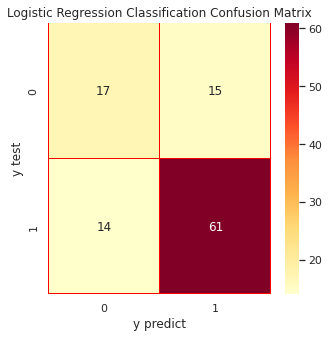

In [ ]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="YlOrRd")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()

In [ ]:
# Test score
classifier_log = classifier.score(X_test, y_pred)
print(classifier_log)

1.0


## KNeighbors Classifier

In [ ]:
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

In [ ]:
knncla.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# Prediccion
y_predict2 = knncla.predict(X_test)

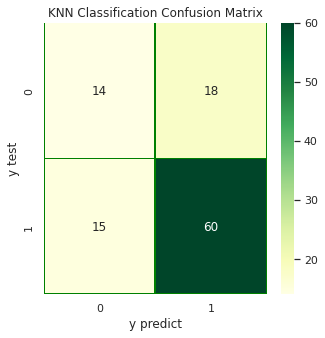

In [ ]:
knncla_cm = confusion_matrix(Y_test, y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='green', fmt='g', ax=ax, cmap="YlGn")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()

In [ ]:
# Test score
knncla_score = knncla.score(X_test, Y_test)
print(knncla_score)

0.6915887850467289


Como se puede ver en los métodos anteriores la precisión de predicción no es muy alta, por lo que consideramos hacer el análisis de nuevo para los modelos luego de balancear los datos con el método Smote de upsampling. 

### Mezcla de algoritmos lineales simples (LR y LDA), no lineales (KNN, CART y NB).

In [ ]:
# realizando un upsampling mediante el método SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x,y = smote.fit_resample(x,y)
print(x.shape, y.shape)
# Se dividen los datos en conjunto de entrenamiento y prueba, se utiliza random_state = 0 para que no dé
# resultados diferentes si se vuelve a correr. 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=10) 
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

(704, 3) (704,)
(563, 3) (141, 3) (563,) (141,)


In [ ]:
models = []
models.append(('Regresión Logística', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('Análisis de discrimintate lineal', LinearDiscriminantAnalysis()))
models.append(('Clasificador de K-Neighbors', KNeighborsClassifier()))
models.append(('Clasificador de árbol de decisión', DecisionTreeClassifier()))
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('SVC', SVC()))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

resultados = []
names = []


# Si se necesita tanto el índice o nombre, así como el elemento, se usa for indice, elemento en lista
for name, model in models:
    kfold = StratifiedKFold(n_splits=25, random_state=123, shuffle=True) # Declaracion de la validación cruzada, las características
    cv_resultados = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') # genera la precisión de la validación cruzada y la guarda en la variable cv_resultados en lista
    resultados.append(cv_resultados)  # genera la precisión de la validación cruzada y la guarda en la variable cv_resultados en matrices, esto para hacer el boxplot.
    names.append(name) # names en matrices
    print('%s: %f (%f)' % (name, cv_resultados.mean(), cv_resultados.std()))

Regresión Logística: 0.880949 (0.062688)
Análisis de discrimintate lineal: 0.924980 (0.058848)
Clasificador de K-Neighbors: 0.914387 (0.047660)
Clasificador de árbol de decisión: 0.900395 (0.065743)
Gaussian Naive Bayes: 0.928538 (0.054154)
SVC: 0.889802 (0.059542)


Regresión Logística


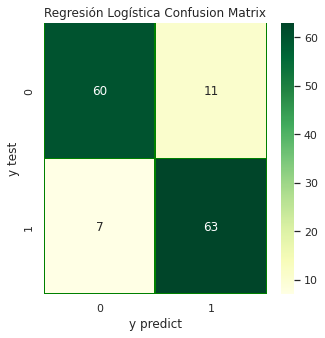


**********************************************************

Análisis de discrimintate lineal


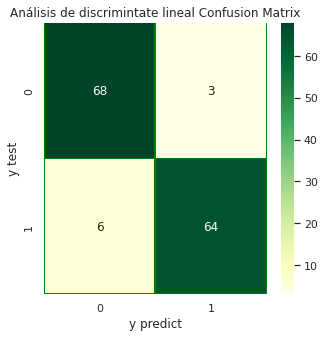


**********************************************************

Clasificador de K-Neighbors


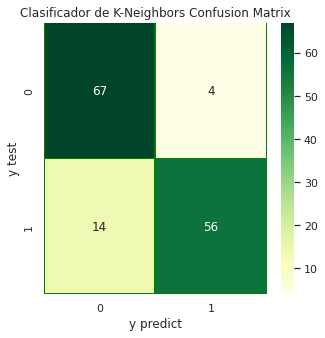


**********************************************************

Clasificador de árbol de decisión


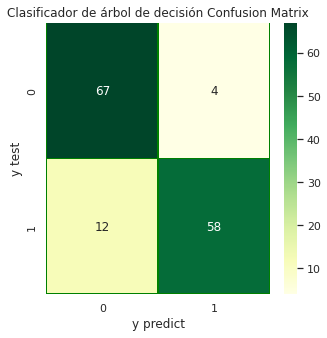


**********************************************************

Gaussian Naive Bayes


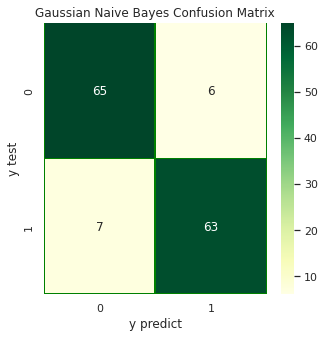


**********************************************************

SVC


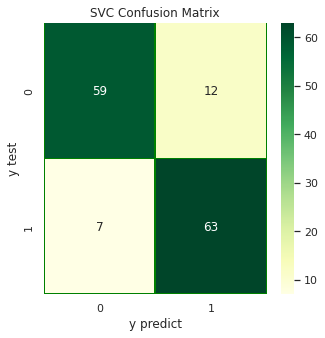


**********************************************************



In [ ]:
# Haciendo predicciones y evaluación del dataset
for name, model in models:
  print(name)
  model.fit(X_train, Y_train)
  prediccion = model.predict(X_test)

  # datadrame es una estructura para manejar datos tabulados para una mayor facilidad de su tratamiento 

  mc =pd.DataFrame(confusion_matrix(Y_test, prediccion, labels=[0, 1]), 
                  index = [0, 1],  
                  columns = [0, 1])  
  

  # Evaluando Predicciones
  f, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(mc, annot=True, linewidth=0.7, linecolor='green', fmt='g', ax=ax, cmap="YlGn")
  plt.title('{} Confusion Matrix'.format(name))
  plt.xlabel('y predict')
  plt.ylabel('y test')
  plt.show()
  print("\n**********************************************************\n")

* Al usar el upsampling se nota un incremento significativo en la precisión de los modelos aumentando los resultados de las pruebas de valor cruzado y disminuyendo el número de falsos positivos y falsos negativos. 
* Encontramos que la prueba con mejores resultados en la matriz de confución es el modelo de Análisis de discriminante lineal a pesar que la que marcó mejor resultado en la prueba de valor cruzado es el modelo Gaussian Naive Bayes. Teniendo en cuenta que la diferencia es mínima en la prueba de valor cruzado, se escoge el modelo de Análisis de discriminante lineal. Este modelo parece seleccionar con bastante precisión si el tumor es benigno o maligno, lo cual puede ayudar a tener un diagnóstico más temprano. 

### Red Neuronal

In [ ]:
# Función para calcular los índices de la calidad de la predicción
def indices_general(MC, nombres = None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global = 1 - precision_global
    precision_categoria  = pd.DataFrame(MC.diagonal()/np.sum(MC,axis = 1)).T
    if nombres!=None:
        precision_categoria.columns = nombres
    return {"Matriz de Confusión":MC, 
            "Precisión Global":precision_global, 
            "Error Global":error_global, 
            "Precisión por categoría":precision_categoria}

# Función para graficar la distribución de la variable a predecir
def distribucion_variable_predecir(data:DataFrame,variable_predict:str):
    colors = list(dict(**mcolors.CSS4_COLORS))
    df = pd.crosstab(index=data[variable_predict],columns="valor") / data[variable_predict].count()
    fig = plt.figure(figsize=(10,9))
    g = fig.add_subplot(111)
    countv = 0
    titulo = "Distribución de la variable %s" % variable_predict
    for i in range(df.shape[0]):
        g.barh(1,df.iloc[i],left = countv, align='center',color=colors[11+i],label= df.iloc[i].name)
        countv = countv + df.iloc[i]
    vals = g.get_xticks()
    g.set_xlim(0,1)
    g.set_yticklabels("")
    g.set_title(titulo)
    g.set_ylabel(variable_predict)
    g.set_xticklabels(['{:.0%}'.format(x) for x in vals])
    countv = 0 
    for v in df.iloc[:,0]:
        g.text(np.mean([countv,countv+v]) - 0.03, 1 , '{:.1%}'.format(v), color='black', fontweight='bold')
        countv = countv + v
    g.legend(loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1)

# Función para ver la distribución de una variable categórica respecto a la predecir
def poder_predictivo_categorica(data:DataFrame, var:str, variable_predict:str):
    df = pd.crosstab(index= data[var],columns=data[variable_predict])
    df = df.div(df.sum(axis=1),axis=0)
    titulo = "Distribución de la variable %s según la variable %s" % (var,variable_predict)
    g = df.plot(kind='barh',stacked=True,legend = True, figsize = (10,9), \
                xlim = (0,1),title = titulo, width = 0.8)
    vals = g.get_xticks()
    g.set_xticklabels(['{:.0%}'.format(x) for x in vals])
    g.legend(loc='upper center', bbox_to_anchor=(1.08, 1), shadow=True, ncol=1)
    for bars in g.containers:
        plt.setp(bars, width=.9)
    for i in range(df.shape[0]):
        countv = 0 
        for v in df.iloc[i]:
            g.text(np.mean([countv,countv+v]) - 0.03, i , '{:.1%}'.format(v), color='black', fontweight='bold')
            countv = countv + v

# Función para ver la distribución de una variable numérica respecto a la predecir
def poder_predictivo_numerica(data:DataFrame, var:str, variable_predict:str):
    sns.FacetGrid(data, hue=variable_predict, height=6).map(sns.kdeplot, var, shade=True).add_legend()

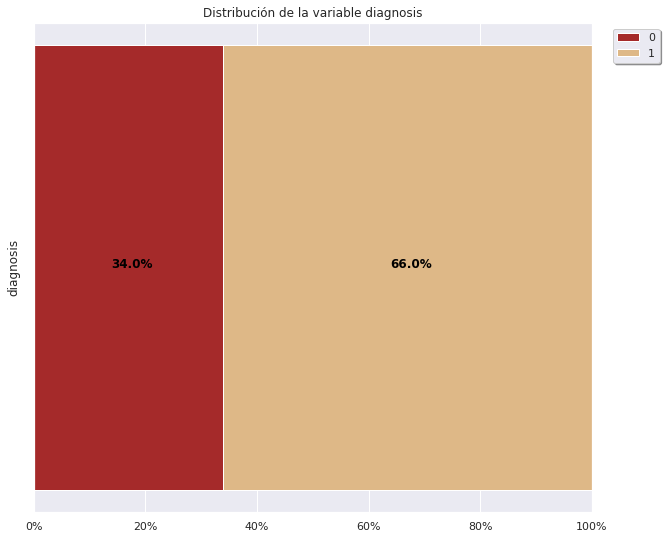

In [ ]:
distribucion_variable_predecir(X,"diagnosis")

In [ ]:
X_Copy = X.copy()
# Normalizando y centrando la tabla ya que hay valores en diferentes escalas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(X_Copy) 
X_Copy.iloc[:,:] = scaled_values
X_Copy.head()

,mean_texture,mean_perimeter,mean_smoothness,diagnosis
0,-2.150252,1.646381,1.720973,-1.394543
1,-0.310938,2.141186,-0.827040,-1.394543
2,0.555207,1.999113,1.054826,-1.394543
3,-1.164639,2.248966,0.350829,-1.394543
4,-0.826145,-0.324513,2.432539,-1.394543


In [ ]:
# Elimina la variable catégorica, deja las variables predictoras en X
X_RN = X_Copy.iloc[:,:-1] 
X_RN

,mean_texture,mean_perimeter,mean_smoothness
0,-2.150252,1.646381,1.720973
1,-0.310938,2.141186,-0.827040
2,0.555207,1.999113,1.054826
3,-1.164639,2.248966,0.350829
4,-0.826145,-0.324513,2.432539
...,...,...,...
528,2.023672,0.107095,0.274374
529,2.576213,-0.907502,-1.602950
530,2.297454,2.057902,0.161583
531,2.255142,0.936016,-0.841423


In [ ]:
# Como la variable a predecir la dan en terminos de 0 y 1, es necesario con vertirla a Si y No.
d = X
df = pd.DataFrame(data=d)
df

,mean_texture,mean_perimeter,mean_smoothness,diagnosis
0,10.38,122.80,0.11840,0
1,17.77,132.90,0.08474,0
2,21.25,130.00,0.10960,0
3,14.34,135.10,0.10030,0
4,15.70,82.57,0.12780,0
...,...,...,...,...
528,27.15,91.38,0.09929,1
529,29.37,70.67,0.07449,1
530,28.25,131.20,0.09780,0
531,28.08,108.30,0.08455,0


In [ ]:
df.replace({0: "No", 1: "Si"}, inplace = True)
print(df.iloc[:,3]) #Resultado fue reemplazado con exito.

0      No
1      No
2      No
3      No
4      No
       ..
528    Si
529    Si
530    No
531    No
532    No
Name: diagnosis, Length: 533, dtype: object


In [ ]:
y = df.iloc[:,3] 
y

0      No
1      No
2      No
3      No
4      No
       ..
528    Si
529    Si
530    No
531    No
532    No
Name: diagnosis, Length: 533, dtype: object

In [ ]:
# realizando un upsampling mediante el método SMOTE
smote = SMOTE(sampling_strategy='minority')
X_RN,y = smote.fit_resample(X_RN,y)

In [ ]:
# Se separan los datos con el 70% de los datos para entrenamiento y el 30% para testing
dummy_y = pd.get_dummies(y)
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_X  = pd.DataFrame(scaler.fit_transform(X_RN), columns = list(X_RN))
X_train, X_test, y_train, y_test = train_test_split(scaled_X, dummy_y, train_size = 0.7, random_state = 0)
print(dummy_y)

     No  Si
0     1   0
1     1   0
2     1   0
3     1   0
4     1   0
..   ..  ..
699   1   0
700   1   0
701   1   0
702   1   0
703   1   0

[704 rows x 2 columns]


In [ ]:
# Creando modelo en Keras
model = Sequential()
model.add(Dense(300, input_dim = 3, activation = 'relu'))  # primera capa oculta con 300 neuronas
model.add(Dense(50, activation = 'sigmoid'))  # segunda capa oculta con 50 neuronas
model.add(Dense(30, activation = 'sigmoid'))  # tercera capa oculta con 30 neuronas
model.add(Dense(20, activation = 'relu'))  # Agregamos cuarta capa oculta con 20 neuronas
model.add(Dense(2, activation = 'softmax')) # Agregamos capa output con 2 neuronas

In [ ]:
# Compilando el modelo
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 300)               1200      
_________________________________________________________________
dense_39 (Dense)             (None, 50)                15050     
_________________________________________________________________
dense_40 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_41 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_42 (Dense)             (None, 2)                 42        
Total params: 18,442
Trainable params: 18,442
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Usando 1000 etapas de entrenamiento (epochs) y actualizando los pesos de la red cada 50 observaciones procesadas (batch_size).
model.fit(X_train, y_train, epochs = 1000, batch_size = 50, verbose = 0)
# La predicción es una matriz con 3 columnas
y_pred = model.predict(X_test)
# Convertimos a columna
y_test_class = np.argmax(np.asanyarray(y_test), axis = 1)  # Convertimos a array
y_pred_class = np.argmax(y_pred, axis = 1)

7/7 [==============================] - 0s 2ms/step - loss: 0.1893 - accuracy: 0.9292


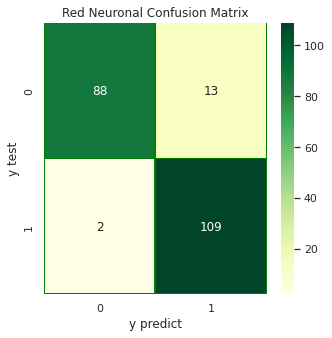


Matriz de Confusión:
[[ 88  13]
 [  2 109]]

Precisión Global:
0.9292452830188679

Error Global:
0.07075471698113212

Precisión por categoría:
         No        Si
0  0.871287  0.981982


In [ ]:
# Predicciones y Calidad del Modelo
scores = model.evaluate(X_test, y_test)
MC = confusion_matrix(y_test_class, y_pred_class)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(MC, annot=True, linewidth=0.7, linecolor='green', fmt='g', ax=ax, cmap="YlGn")
plt.title('Red Neuronal Confusion Matrix')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))

In [ ]:
# Validación cruzada

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# funcion para crear el modelo, requerido por KerasClassifier
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim = 3, activation = 'relu'))  # primera capa oculta con 300 neuronas
    model.add(Dense(8, activation = 'sigmoid'))  # segunda capa oculta con 50 neuronas
    model.add(Dense(1, activation = 'sigmoid'))  # tercera capa oculta con 30 neuronas
  # Compila el modelo
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Fija las semillas aleatorias para la reproducibilidad
import numpy
seed = 2
numpy.random.seed(seed)

# split para la variables predictoras (X) y a predecir (y)
X_RN = X_Copy.iloc[:,:-1]
Y = X.iloc[:,3]

# crea el modelo
model = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=50, verbose=0)

# evalua usando 5 - fold validacion cruzada
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
results = cross_val_score(model, X_RN, Y, cv=kfold)
print(results.mean())

# Asignando variable para grafico
res_keras = results.mean()

0.9211684664090475


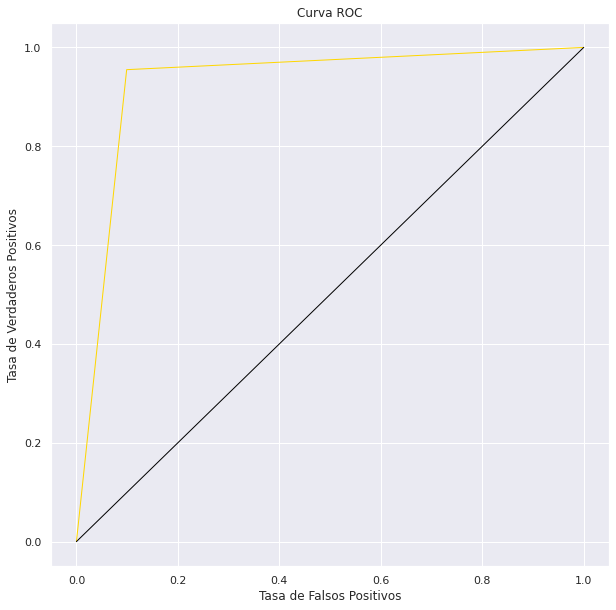

In [ ]:
# Función para graficar la Curva ROC

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

def plotROC(real, prediccion, color = "red", label = None):
    fp_r, tp_r, umbral = roc_curve(real, prediccion)
    plt.plot(fp_r, tp_r, lw = 1, color = color, label = label)
    plt.plot([0, 1], [0, 1], lw = 1, color = "black")
    plt.xlabel("Tasa de Falsos Positivos")
    plt.ylabel("Tasa de Verdaderos Positivos")
    plt.title("Curva ROC")

# Definiendo Modelo
model = Sequential()
model.add(Dense(300, input_dim = 3, activation = 'relu'))  # primera capa oculta con 300 neuronas
model.add(Dense(50, activation = 'sigmoid'))  # segunda capa oculta con 50 neuronas
model.add(Dense(30, activation = 'sigmoid'))  # tercera capa oculta con 30 neuronas
model.add(Dense(20, activation = 'relu'))  # Agregamos cuarta capa oculta con 20 neuronas
model.add(Dense(2, activation = 'softmax')) # Agregamos capa output con 2 neuronas
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])  
model.fit(X_train, y_train, epochs = 1000, batch_size = 50, verbose = 0)
# La predicción es una matriz con 3 columnas
y_pred = model.predict(X_test)
# Convertimos a columna
y_test_class = np.argmax(np.asanyarray(y_test), axis = 1)  # Convertimos a array
y_pred_class = np.argmax(y_pred, axis = 1)
# Genera la Curva ROC para Redes Neuronales usando paquete Keras
plt.figure(figsize=(10,10))
plotROC(y_test_class, y_pred_class, color = "gold")

In [ ]:
Keras = roc_auc_score(y_test_class, y_pred_class)
print("Área bajo la curva ROC en Redes Neuronales Paquete Keras: {:.3f}".format(Keras))

Área bajo la curva ROC en Redes Neuronales Paquete Keras: 0.928


Como se puede ver, el modelo de redes neuronales tiene valores muy positivos tanto con la curva ROC como con la prueba de valores cruzados y la matriz de confusión. Sin embargo sigue teniendo un mejor rendimiento el modelo de Análisis de discriminante lineal para predecir si el tumor es maligno o benigno.  


### Anexos

Fuentes de informacion primaria:

* Siti Khotijah, 2020, kaggle, open, https://www.kaggle.com/khotijahs1/diagnostic-accuracy-of-different-ml-breast-cancer/notebook

* Homayoon Khadivi, 2020, kaggle, open, https://www.kaggle.com/homayoonkhadivi/svm-logistic-regression-pca-cancer-95#Feature-Selection/Feature-Engineering

Fuentes secundarias de informacion_ 

* Asri, H., Mousannif, H., Moatassime, H. A., & Noel, T. (2016). Using Machine Learning Algorithms for Breast Cancer Risk Prediction and Diagnosis. Procedia Computer Science, 83, 1064–1069. https://doi.org/10.1016/j.procs.2016.04.224

* Yael, K. (2021). Wisconsin Breast Cancer (Diagnostic) DataSet Analysis. Amazonaws.com. https://rstudio-pubs-static.s3.amazonaws.com/344010_1f4d6691092d4544bfbddb092e7223d2.html

‌


